# ModSim Project 1

### Arwen Sadler and Robin Graham-Hayes

In [8]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import everything from modsim
from modsim import *

# import everything from SymPy.
from sympy import *

#Import read_csv function from pandas
from pandas import read_csv

#### Assuming current trends hold, when will the Steller Sea Lion population regrow to a sustainable size?

Steller Sea Lions are carnivorous marine mammals that are defined as "Near Threatened," having been taken off the endangered species list in 2013. It's estimated that their population fell from 70-80% after the 70s, but their population made a comeback in the 00s. It would be useful to have a model projecting what the population will look like in the future to determine when/if their population will regrow to its former size, and also to determine if the population will trend toward threatened or endangered again.

Based on the NOAA's (The National Oceanic and Atmospheric Administration) data, we chose to make an exponential growth curve with a yearly growth of about 2%.

The NOAA has population data for Steller Sea Lions from 1995 to 2017:

In [13]:
#Read the csv file that contain data and set the index to be the column with the header, 'Year'
data = read_csv('Sea_Lion_Data.csv', encoding = "ISO-8859-1", index_col = 'Year')

,StellarSeaLion
Year,
1995,67100
1996,80946
1998,69903
1999,69434
2000,69434
2001,65605
2003,65803
2005,83509
2006,86873


Next, we define a function to update the population every year, based on the current population and an annual growth rate.

In [14]:
#Define a function that takes a system object "system"
def run_simulation(system):
    results = TimeSeries()    #Create a 'results' variable that is a TimeSeries
    results[system.t_0] = system.p_0   #Initialize the TimeSeries at the first value in the data
    for t in linrange(system.t_0, system.t_end):    #For each year in the data:
        results[t+1] = system.annual_growth * results[t]    #Take the next year in the TimeSeries and set it equal to the annual growth * the current population size
    return results    #Return the TimeSeries

Next, we make the system object referenced in the simulation function.

In [16]:
sealion = data.StellarSeaLion    #Get the population data and put it in a variable

t_0 = get_first_label(sealion) #Create variable for the first year of data
t_end = get_last_label(sealion) #Create variable for the final year of data

p_0 = get_first_value(sealion) #Create variable for the first entry of data
p_end = get_last_value(sealion) #Create variable for the final entry of data

annual_growth = 1.023 #Set annual growth rate to a rate determined by experimentation


#Make system object storing needed variables 
system = System(t_0=t_0, 
                t_end=t_end,
                p_0=p_0,
                annual_growth=annual_growth)

,values
t_0,1995.000
t_end,2017.000
p_0,67100.000
annual_growth,1.023


Below we run the simulation and plot the results superimposed over the NOAA data.

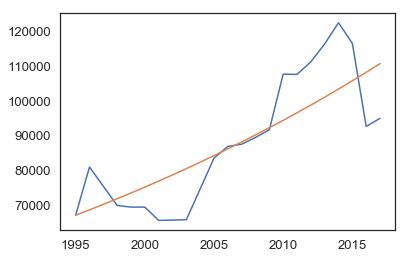

In [17]:
results = run_simulation(system) #Run the simulation and store it in a TimeSeries

plt.plot(data.index,data.StellarSeaLion,results) #Plot the Stellar Sea Lion population data

Below we will try and project the year where seal populations recover the 70-80% (here simplified to 75%) lost after the 70s, assuming that the starting population in 1995 is about 25% of the sustainable population and that the trend in the model above depicts the overall trend:

In [18]:
#Define a function that takes a system object "system"
def run_projection(system,projection_end):
    results = TimeSeries()    #Create a 'results' variable that is a TimeSeries
    results[system.t_0] = system.p_0   #Initialize the TimeSeries at the first value in the data
    for t in linrange(system.t_0, projection_end):    #For each year in the data:
        results[t+1] = system.annual_growth * results[t]    #Take the next year in the TimeSeries and set it equal to the annual growth * the current population size
    return results    #Return the TimeSeries

2056 268618.6589544108


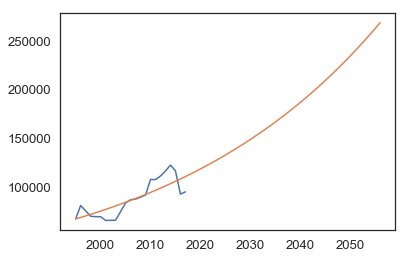

In [19]:
end_projection=t_end+1 #Start iteration variable after last year of data
results2 = run_projection(system,end_projection) #Run projection simulation continuing after last year of data
while results2[end_projection] <= data.StellarSeaLion[t_0]*4: #Run projection simulations untill the population has 
    end_projection+=1                                         #regrown to its pre 1970's population
    results2 = run_projection(system,end_projection)

#Plot the Stellar Sea Lion population data
plt.plot(data.index,data.StellarSeaLion,results2) #Plot data and simulation
print(end_projection,results2[end_projection])

The figure above displays the projected population based on the data given. If our model is accurate, the Steller Sea Lion population will regrow to what it was before its drop after the 70s in 2056.

While our model represents the general trend of the data, it does not closely follow the data.

Our model was restricted by the fact that the data given was severely limited. 

Due to the constraints of counting wild sea mammal populations and the late start of data collection, we were limited by error-prone population estimations without any error estimates, and with a small sample of data. 

Given a larger sample of data we would get a better understanding of the overall trend, as our model did not account for major rises and falls of the population.

We also make the assumption that the population in 1995 is 25% of the population from before the decline after the 70s, which may not be the case.

We also assumed that the data was growing exponentialy which would result in a unchecked population that would tend towards infinate and never reach a carrying capacity.

In the future we would like to include some  the amount of error in the data as well as how that would propogate with our model. Given more data we would work on trying to find a trend that incorpotates a reasonable carrying capacity as well as other factors such as rising sea tempeture that would affect food supply as well as living conditions.